In [ ]:
!pip install segment-geospatial

In [ ]:
import os
import leafmap
from samgeo import SamGeo, show_image, download_file, overlay_images, tms_to_geotiff

image = "/content/side.png"  #replace with your file

sam = SamGeo(
    model_type="vit_h",
    sam_kwargs=None,
)

In [ ]:
sam.generate(image, output="masks.png", foreground=True, unique=True)

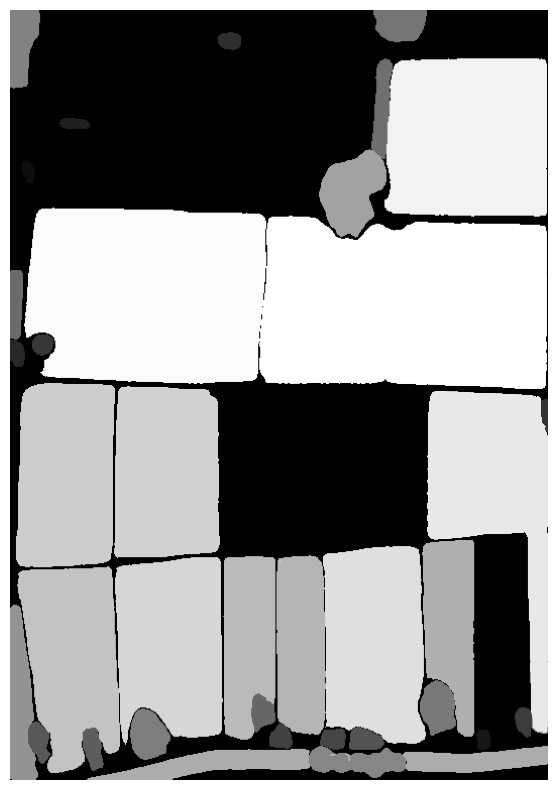

In [ ]:
sam.show_masks(cmap="binary_r")

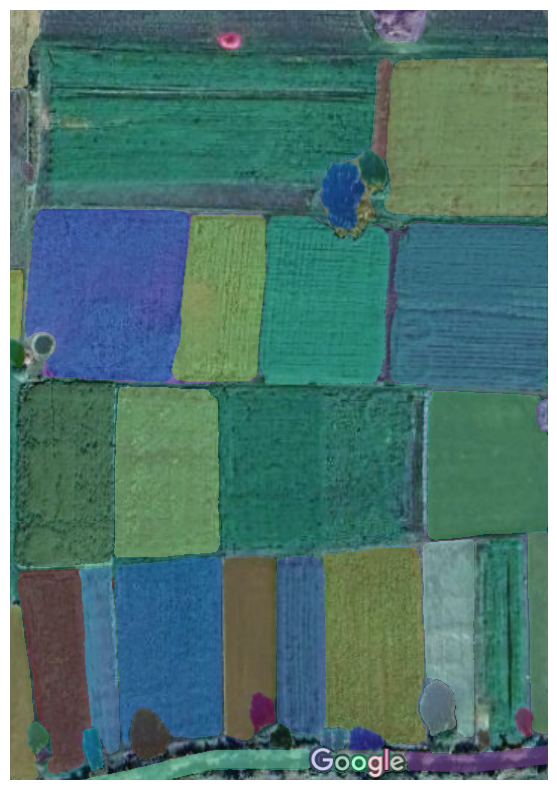

In [ ]:
sam.show_anns(axis="off", opacity=1, output="annotations.png")

In [ ]:
from skimage import measure
from skimage.io import imread

# Load the generated mask image
mask_image = imread("masks.tif")

# Threshold the mask image to convert it into binary
binary_mask = mask_image > 0

# Label connected components in the binary mask
labeled_mask, num_segments = measure.label(binary_mask, background=0, return_num=True)

print("Number of segments:", num_segments)


Number of segments: 18
